In [1]:
!pip install seaborn scikit-learn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../../data/raw/housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.shape

(50000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [7]:
df['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

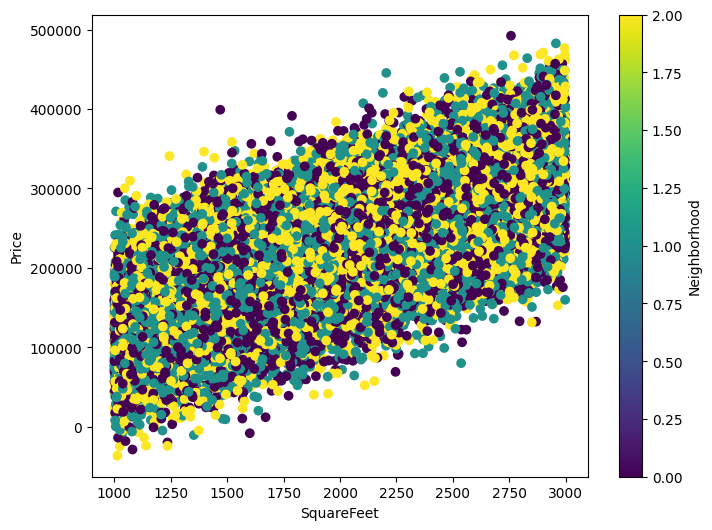

In [8]:
plt.figure(figsize=(8, 6))
df['Neighborhood'] = df['Neighborhood'].astype('category')
plt.scatter(x=df['SquareFeet'], y=df['Price'], c=df['Neighborhood'].cat.codes, cmap='viridis')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.colorbar(label='Neighborhood')
plt.show()

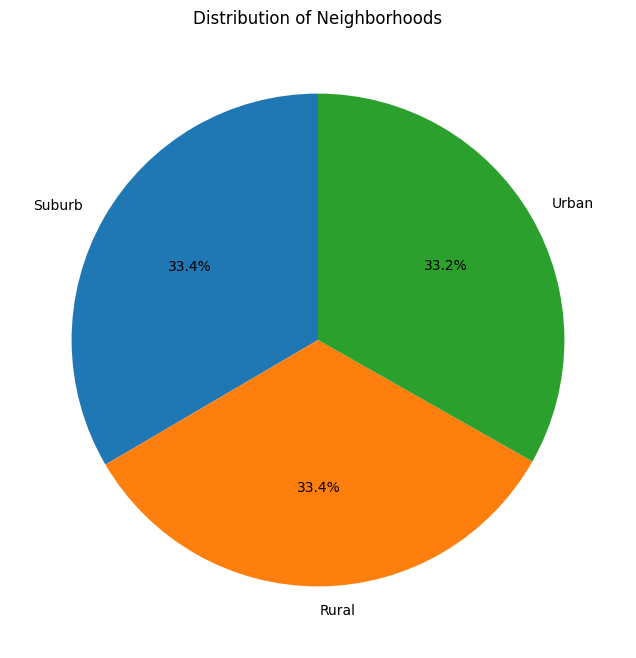

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(df['Neighborhood'].value_counts(), labels=df['Neighborhood'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Neighborhoods')
plt.show()

In [10]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
encoder = LabelEncoder()
df['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


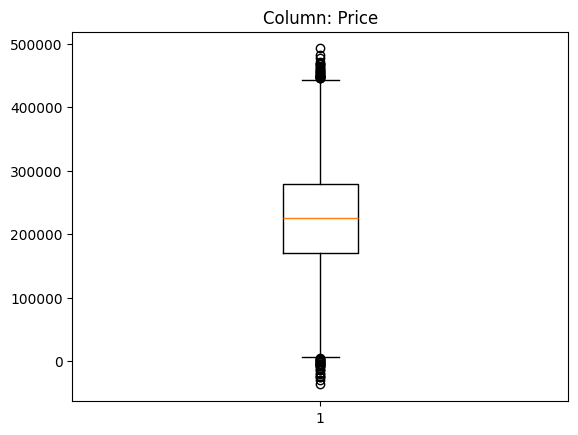

In [13]:
plt.boxplot(df['Price'])
plt.title('Column: Price')
plt.show()

In [14]:
df.drop(df[df.Price <= 0].index, axis = 0, inplace = True)

<Axes: >

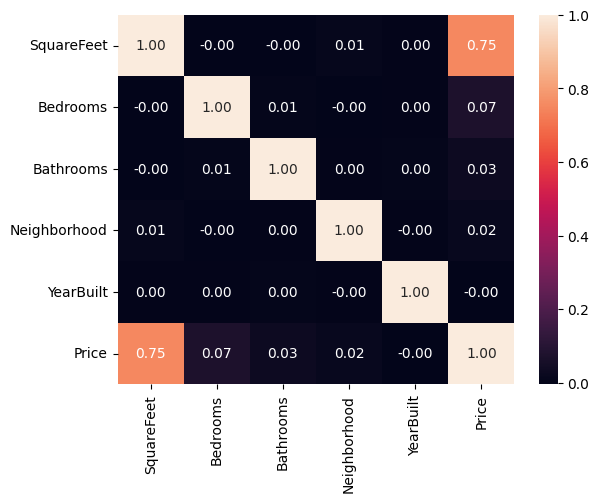

In [15]:
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f")

In [16]:
ds = df.drop(columns = ["YearBuilt"], axis = 1)
ds_train, ds_test = train_test_split(ds, test_size=0.3, random_state=42)

In [17]:
ds.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price
0,2126,4,1,0,215355.283618
1,2459,3,2,0,195014.221626
2,1860,2,1,1,306891.012076
3,2294,2,1,2,206786.787153
4,2130,5,2,1,272436.239065


In [18]:
ds_train.to_csv("../../data/baselines/train.csv")
ds_test.to_csv("../../data/baselines/test.csv")